### Jupyter Notebook to compute morphological metrics from axon and myelin segmentation of a microscopy sample.

- To use it, you need the paths of the microscopy image and the segmentation prediction (output of AxonDeepSeg).


#### Imports

In [27]:
import numpy as np
import math
import os
import matplotlib.pyplot as plt

from AxonDeepSeg.morphometrics.compute_morphometrics import (
                                                                get_axon_morphometrics,
                                                                save_axon_morphometrics,
                                                                load_axon_morphometrics,
                                                                draw_axon_diameter,
                                                                get_aggregate_morphometrics,
                                                                write_aggregate_morphometrics
                                                            )
                                                    
import AxonDeepSeg.ads_utils as ads
from config import axonmyelin_suffix

%matplotlib inline

import PIL
from PIL import Image, ImageOps
PIL.Image.MAX_IMAGE_PIXELS = None

#### Read image and segmented prediction

In [28]:
# Change the image and segmentation paths here for your sample:
path_img_dir = '/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p17_1900x_0002/'
#path_img = 'image.png'
path_img = os.path.join(path_img_dir,'image.png')
print(path_img)
#path_pred = os.path.join(path_img_dir,'image' + str(axonmyelin_suffix))
path_pred = os.path.join(path_img_dir, 'mask.png')
print(path_pred)

/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p17_1900x_0002/image.png
/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p17_1900x_0002/mask.png


In [29]:
# Read paths and compute axon/myelin masks
img = ads.imread(path_img)
pred = ads.imread(path_pred)

pred_axon = pred > 200
pred_myelin = np.logical_and(pred >= 50, pred <= 200)
path_folder, file_name = os.path.split(path_img)
print(path_folder)

/home/groups/bzuchero/axondeepseg/data/processed/Test/WT2_p17_1900x_0002


### Step-by-step use case: extract morphometrics from a segmented microscopy sample

#### 1) Get axon morphometrics

In [30]:
# Compute axon morphometrics
stats_array, index_image_array = get_axon_morphometrics(pred_axon,path_folder, axon_shape="ellipse", return_index_image=True)

#### 2) Save axon morphometrics and load back

In [31]:
save_axon_morphometrics(path_folder,stats_array)
stats_array = load_axon_morphometrics(path_folder)

#### 3) Extract and plot axon diameter distribution

In [32]:
# Get axon diameter distribution
axon_diam_list = [d['axon_diam'] for d in stats_array]

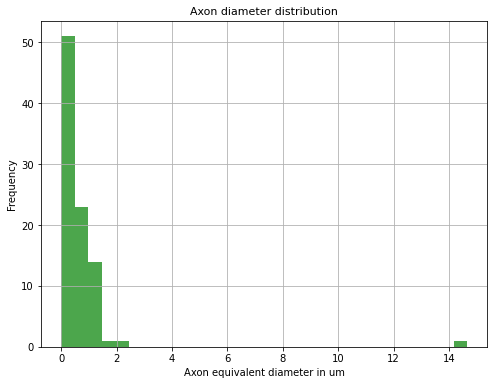

In [33]:
# Plot histogram of axon diameter distribution
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(axon_diam_list,30, facecolor='g', alpha=0.7)
plt.xlabel('Axon equivalent diameter in um',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Axon diameter distribution',fontsize=11)
plt.grid(True)

#### 4) Display boxplots of other axonal morphometrics (example with solidity and eccentricity)

In [34]:
# Get axon solidity distribution (measure of compactness of the axon)
axon_solidity_list = [d['solidity'] for d in stats_array]
# Get axon eccentricity distribution (measure of ellipticity/extent of the axon)
axon_eccentricity_list = [d['eccentricity'] for d in stats_array]

[Text(1, 0, 'Solidity'), Text(2, 0, 'Eccentricity')]

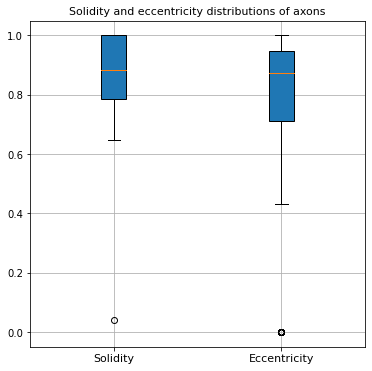

In [35]:
# Plot boxplots of solidity and eccentricity
plt.figure(figsize=(6,6))
data_to_plot = [axon_solidity_list,axon_eccentricity_list]
plt.boxplot(data_to_plot,patch_artist=True)
plt.title('Solidity and eccentricity distributions of axons',fontsize=11)
plt.grid(True)
frame1 = plt.gca()
frame1.set_xticklabels(['Solidity', 'Eccentricity'],fontsize=11)

#### 5) Display and save axon mask overlay labelled for axon diameter

/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


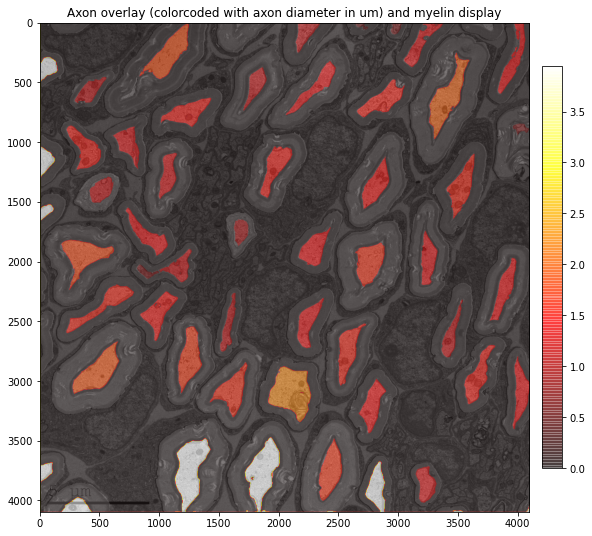

In [36]:
fig = draw_axon_diameter(img,path_pred,pred_axon,pred_myelin)
from IPython.core.display import display
fig.canvas.draw()
display(fig)

#### 6) Compute aggregate axon/myelin morphometrics

In [37]:
# Compute aggregate metrics
aggregate_metrics = get_aggregate_morphometrics(pred_axon,pred_myelin,path_folder)
print(aggregate_metrics)

{'avf': 0.13544243574142456, 'mvf': 0.4031776189804077, 'gratio_aggr': 0.5014597938857132, 'mean_axon_diam': 0.7154714673662987, 'mean_myelin_diam': 1.4267773330783935, 'mean_myelin_thickness': 0.3556529328560474, 'axon_density_mm2': 150667.29651557075}


#### 7) Save aggregate metrics

In [38]:
write_aggregate_morphometrics(path_folder,aggregate_metrics)

#### Other useful code snippets

In [39]:
# Show metrics available for axons
print(stats_array[0].keys())

dict_keys(['y0', 'x0', 'axon_diam', 'axon_area', 'axon_perimeter', 'solidity', 'eccentricity', 'orientation'])


In [40]:
# Get axon diameter value of axon object 0
print(stats_array[0]['axon_diam'])

14.650850397153091


In [41]:
# Get solidity value of axon object 50
print(stats_array[49]['solidity'])

1.0


In [42]:
# Display all stats for axon object 10
print(stats_array[9])

{'y0': 2.0, 'x0': 1687.4545454545455, 'axon_diam': 0.022067157611552587, 'axon_area': 0.00039600000000000003, 'axon_perimeter': 0.05897056274847714, 'solidity': 1.0, 'eccentricity': 0.4315383352117126, 'orientation': 0.6110126616054948}


In [43]:
# Get axon diameter value of all axons in list
axon_diam_list = [d['axon_diam'] for d in stats_array]

In [44]:
# Get number of axons in sample
print(np.size(axon_diam_list))

91


In [45]:
# Get mean diameter
mean_diam = np.mean(axon_diam_list)
print(mean_diam)

0.6136354375811096


In [46]:
# Get max diameter
max_diam = np.max(axon_diam_list)
print(max_diam)

14.650850397153091
